<a href="https://colab.research.google.com/github/lacastanop/se-alesys/blob/main/Parcial_1_Laura_Sofia_Casta%C3%B1o_Pineda(Corregido).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial I - Simulaciones b y c

# **Ejercicio b**

Definimos la función para generar el cero y la pendiente en cada punto de la discretización.
En la práctica, el proceso de calcular líneas tangentes a una señal puede resultar útil para una variedad de aplicaciones, como en el procesamiento de señales, donde la pendiente de una señal se puede utilizar para determinar la tasa de cambio de una cantidad física, como la temperatura. , presión o velocidad.

In [ ]:
def my_ceropen(x,ymin = -5, ymax = 5): #Definimos la funcion ceropen para tomar la pendiente de cada punto discretizado en la señal
    xmax = max(x) # x.max()
    xmin = min(x) # x.min()
    m = (ymax - ymin)/(xmax - xmin)#pendiente de la recta a partir de 2 puntos
    c = ymin - m*xmin #corresponde al punto de intersección de la recta
    yv = m*x + c #Asignamos a yv la ecuacion de la recta análoga a y = mx + b
    return yv #retornamos las rectas

Definimos la función para cuantizar punto a punto. El proceso de cuantificación normalmente implica mapear cada valor continuo de la señal al valor discreto más cercano dentro de un rango específico. El rango de valores discretos suele estar determinado por el número de bits utilizados para representar la señal cuantificada.

In [ ]:
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind] #retorna un nuevo vector con atributos de ind

# Conversor análogo digital
Realicé la discretización de la señal de acuerdo a la frecuencia de muestreo Fs = 5000 Hz.
En dicho proceso el coversor convierte una señal analógica en una señal digital muestreando la señal en intervalos específicos y asignando un valor digital a cada muestra.

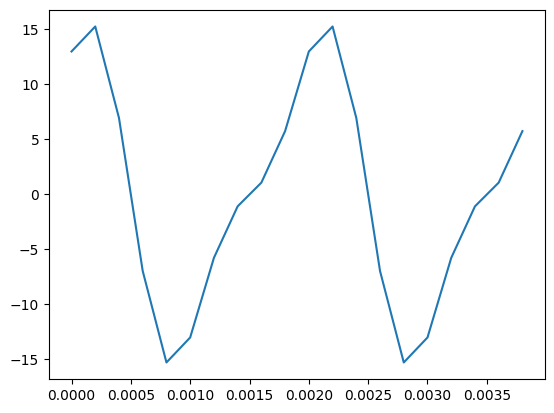

(20, 8)

In [ ]:
import numpy as np #importamos la librería numpy con el alias de np --> para que reciba los arreglos
import matplotlib.pyplot as plt #importamos la librería de matplotlib.pyplot co el alias de plt --> para graficar
from scipy.spatial.distance import cdist #importamos esta libreria para calcular distancias entre pares de puntos o conjuntos de puntos en un espacio vectorial

#Definimos la señal 1
w1 = 1000*np.pi #Velocidad angular
F1 = w1/(2*np.pi) #Frecuencia
T1 = 1/F1 #Periodo
A1= 3 #Amplitud

#Señal 2
w2 = 2000*np.pi
F2 = w2/(2*np.pi)
T2 = 1/F2
A2= 5

#Señal 3
w3 = 11000*np.pi
F3 = w3/(2*np.pi)
T3 = 1/F3
A3 = 10

Fs = 5000 #Fs corresponde al a fecuencia que nos dan en el ejercicio
Ts = 1/Fs #El periodo es inverso a la frecuencia
tv = np.arange(0,2*T1,Ts)#procesar dos periodos discretizados
#inicio en 0 y fin en 2 veces T1, dando saltos cada Ts (Está siguiendo al periodo de la señal más lenta)
y = 13*np.cos(w1*tv) + A2*np.sin(w2*tv) #Al discretizar la función original, encontramos que la señal 3 era copia de la señal 1 por tanto al tener la misma frecuencia se suman

#Mostramos en pantalla la señal
plt.plot(tv,y) #señal graficada
plt.show() #muestra la señal

#cero y pendiente
ycs = my_ceropen(y, ymin=-5,ymax=5) #Escalamos"y" de acuerdo a los valores que va tomando la pendiente en cada recta
#Establecemos los límites en el eje y, la amplitud más alta de la señal es 10, por tanto centralizamos la señal
#de -5 a 5 hay 10 unidades

#número de bits y vector de cuantización
nbits = 3
rmin = -5
rmax = 5
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#distancias y cero pendiente a vector cuantizacion
d = cdist(ycs.reshape(-1,1),ve.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
d.shape # d es una matriz de 500 x 8, ej: la fila 1 incluye la distancia euclidea entre y[0] y los 8 elementos en ve

Recorremos el vector cero y la señal discretizada para cuantizar con el objetivo de que durante el proceso de cuantificación garanticemos que cada muestra se cuantice individualmente

In [ ]:
for i in range(ycs.shape[0]): #Para cada i que esté en el rango ()
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #apilar datos cuantizando si i>0

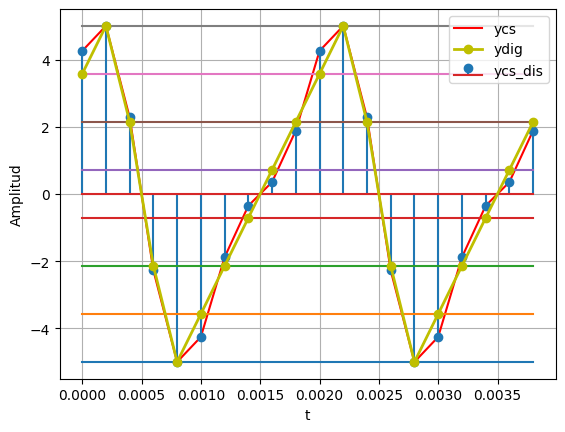

In [ ]:
#graficar señales

plt.plot(tv,ycs,c='r', label='ycs')#cs continua

plt.stem(tv,ycs, label='ycs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

# Señal discretizada con la frecuencia apropiada
Al comprobar por medio de Nyquist, la fecuencia maxima entre las 3 señales dió mayor a la frecuencia otorgada en el ejercicio y por ende, para que la frecuencia sea apropiada debe ser:

Fs >= 2 * F(maxima) de (F1,F2,F3) --> Frecuencia de las señales.

 La frecuencia de discretización y la resolución de cuantificación son consideraciones importantes en la conversión de una señal analógica a una señal digital. La frecuencia de discretización debe ser lo suficientemente alta para capturar con precisión el componente de frecuencia más alta de la señal, mientras que la resolución de la cuantificación debe ser lo suficientemente alta para mantener la exactitud y precisión deseadas de la señal digital.

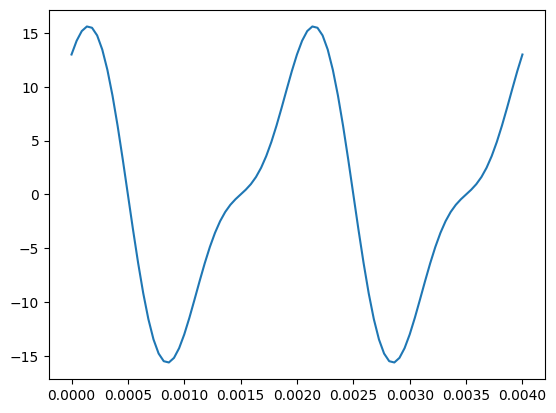

(89, 8)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

#Señal 1
w1 = 1000*np.pi
F1 = w1/(2*np.pi)
T1 = 1/F1
A1= 3

#Señal 2
w2 = 2000*np.pi
F2 = w2/(2*np.pi)
T2 = 1/F2
A2= 5

#Señal 3
w3 = 11000*np.pi
F3 = w3/(2*np.pi)
T3 = 1/F3
A3 = 10

Fs = 22000 #Hicimos el cambio de la frecuencia a 2 la frecuencia máxima entre las 3 señales
#Fmaxima = 5500  y 2(5500) = 11000
Ts = 1/Fs
tv = np.arange(0,2*T1,Ts)#procesar dos periodos discretizados
y = 13*np.cos(w1*tv) + A2*np.sin(w2*tv)

plt.plot(tv,y) #señal graficada
plt.show()

#cero y pendiente
ycs = my_ceropen(y, ymin=-5,ymax=5) #escalamos "y" de acuerdo a los valores que va tomando la pendiente en cada recta

#número de bits y vector de cuantización
nbits = 3
rmin = -5
rmax = 5
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#distancias y cero pendiente a vector cuantizacion
d = cdist(ycs.reshape(-1,1),ve.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
d.shape # d es una matriz de 500 x 8, ej: la fila 1 incluye la distancia euclidea entre y[0] y los 8 elementos en ve

In [ ]:
#recorrer vector cero y spam discretizado para cuantizar

for i in range(ycs.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #apilar datos cuantizando si i>0

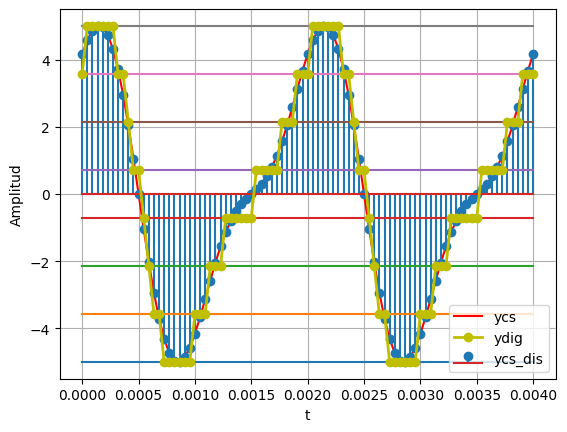

In [ ]:
#graficar señales

plt.plot(tv,ycs,c='r', label='ycs')#cs continua

plt.stem(tv,ycs, label='ycs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

# **Ejercicio c**

In [ ]:
#función cero y pendiente
def my_ceropend(x,xhmax=10,xhmin=0): #La funcion llamada my_ceropend recibe dos argumentos xhmax y xhmin
  #cálculo de pendiente y cero
  m = (xhmax-xhmin)/(x.max()-x.min()) #m corresponde a la pendiente que se calcula con la formula de una recta despejando m
  b = xhmin - m*x.min() #b corresponde al punto de intersección con la recta
  xh = m*x+b #Ecuacion de la recta xh
  return xh #devuelde xh

<ipython-input-33-332c0be0115d>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados


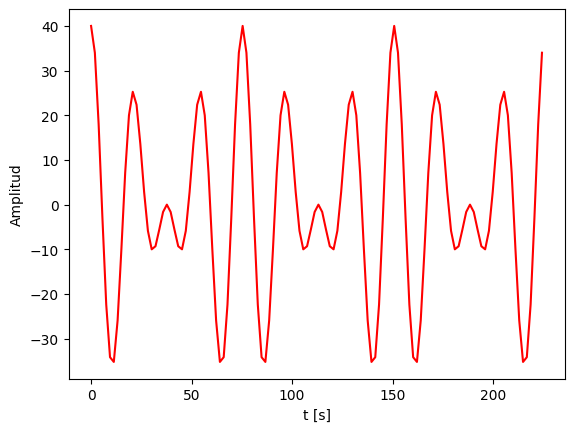

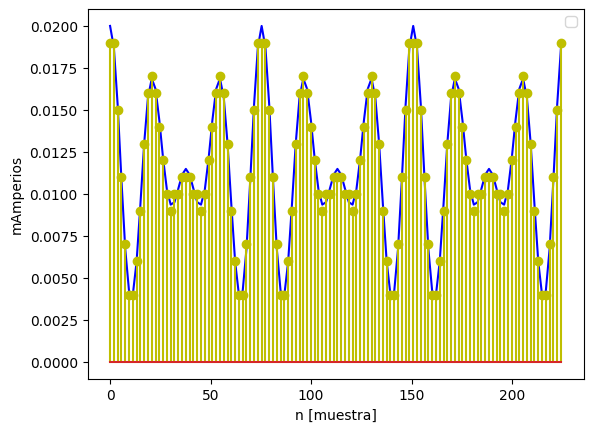

In [ ]:
import numpy as np #importamos la librería numpy con el alias de np --> para que reciba los arreglos
import matplotlib.pyplot as plt #importamos la librería de matplotlib.pyplot co el alias de plt --> para graficar
from scipy.spatial.distance import cdist #importamos esta libreria para calcular distancias entre pares de puntos o conjuntos de puntos en un espacio vectorial

T1 = 6*np.pi #periodo señal 1
T2 = 8*np.pi #periodo señal 2
F1 = 1/T1 #frecuencia de la señal 1
F2 = 1/T2 #frecuencia de la señal 2
T = 24*np.pi #perido cuasiperiódica - corresponde al periodo calculado t(MCM) = 24*pi, pi es posible leerlo gracias a la librería numpy
Fs = 10*max(F1,F2) #frecuencia muestreo --> corresponde a la frecuencia máxima entre F1 y F2 (la más rápida)
t = np.arange(0,3*T,1/Fs) #vector de tiempo, se muestran 3 periodos
x = 20*(np.cos(t/3)+np.cos(t/4)) #asignamos x(t) como la funcion original
xhmax = 0.020 #El rango es de 20 mA
xhmin = 0.004 #a 4 mA
xh = my_ceropend(x,xhmax, xhmin).reshape(-1,1)#aplicar cero y pendiente de 4 a 20 y cambiamos el vector fila por el vector columna
#asegurar vector columna

#cuantizar
nbits = 4 #número bits, en este caso corresponde a 4 bits
Ne = 2**nbits #cantidad de estados --> es base 2 elevado a la cantidad de bits = 16 en total
res = (xhmax-xhmin)/Ne #resolución cuantización la cuantización hace referencia a la diferencia entre xmax y xmin sobre la cantidad de estados
ve = np.arange(xhmin,xhmax,res).reshape(-1,1)#vector de estados, el inicio xmin el fin en xmax y salta cada res
#asegurar vector columna con el .reshape

xq = np.zeros(len(xh)) #señal cuantizada
for i in range(len(xh)): #recorrer señal cero y pendiente
    xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados

#gráficas de señales
plt.plot(t,x,'r',label='')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.show()
plt.plot(t,xh,'b',label='')
plt.stem(t,xq,'y',label='')
plt.xlabel('n [muestra]')
plt.ylabel('mAmperios')
plt.legend()
plt.show()


In [ ]:
he = np.array([2,4,1,5,0,10]) #respuesta al escalón del slit
h = np.diff(he)#respuesta al impulso del slit (derivada de la respuesta al escalon)
print(h)

[ 2 -3  4 -5 10]


Se realiza la convolución de señales: La convolución de señales, o correlación cruzada, es una operación matemática que combina dos funciones (señales) para producir una tercera función que expresa cómo la forma de una es modificada por la otra. En el contexto del procesamiento de señales, se puede utilizar para representar el efecto de un sistema lineal invariante en el tiempo sobre una señal.

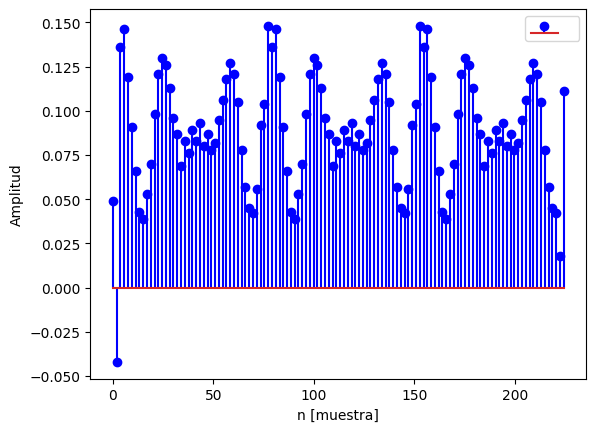

In [ ]:
y = np.convolve(xq,h,mode='same')#respuesta del slit -> se asegura tamaños iguales con mode=same
#graficar señal
plt.stem(t,y,'b',label=' ')
plt.legend()
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.show()